# Problem 1(a): Load the data and verify its shape

In [8]:

import pandas as pd

# Load the dataset
file_path = '/content/dataset.csv'
data = pd.read_csv(file_path, header=1)  # Skip the first row as it's a header

# Convert all data to numeric
data = data.apply(pd.to_numeric)

# Verify the data shape
print("Data Shape:", data.shape)


Data Shape: (1499, 4)


# Problem 1(b): Dimensionality reduction using PCA

In [20]:

from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality from 4 to 2
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data)

# Display the transformed data shape
print("Reduced Data Shape:", data_2d.shape)


Reduced Data Shape: (1499, 2)


In [23]:
import numpy as np
import pandas as pd

# Convert the DataFrame to a NumPy array
X = data.values

# 1. Center the data
X_centered = X - np.mean(X, axis=0)

# 2. Calculate the covariance matrix
covariance_matrix = np.cov(X_centered.T)

# 3. Perform eigendecomposition
eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

# 4. Sort eigenvalues and eigenvectors
sorted_indices = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]

# 5. Select the top 2 eigenvectors
principal_components = sorted_eigenvectors[:, :2]

# 6. Project the data
data_2d = X_centered @ principal_components

# Verify the shape
print("Reduced Data Shape:", data_2d.shape)

Reduced Data Shape: (1499, 2)


# Problem 1(c): Visualize the 2D data

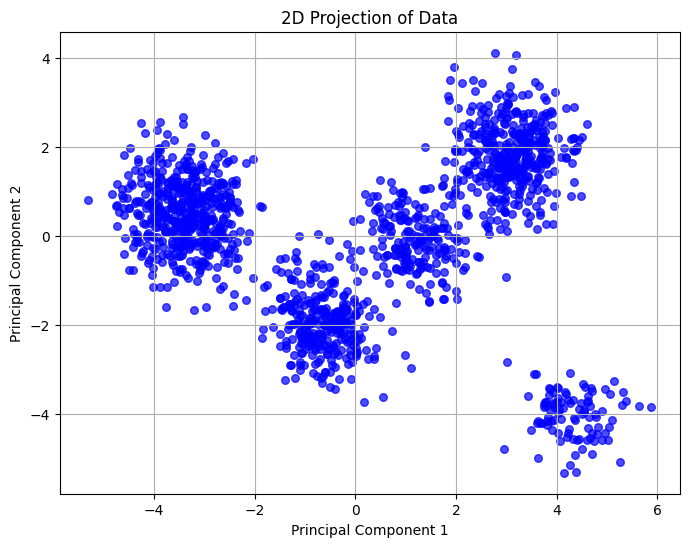

In [24]:

import matplotlib.pyplot as plt

# Plot the 2D data
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c='blue', s=30, alpha=0.7)
plt.title('2D Projection of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


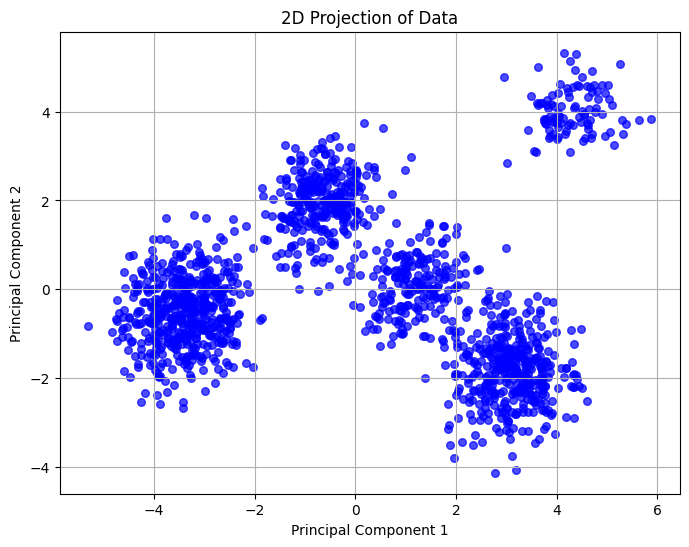

In [21]:

import matplotlib.pyplot as plt

# Plot the 2D data
plt.figure(figsize=(8, 6))
plt.scatter(data_2d[:, 0], data_2d[:, 1], c='blue', s=30, alpha=0.7)
plt.title('2D Projection of Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()


# Problem 1(d): Implement K-means clustering

Running iteration 1/10


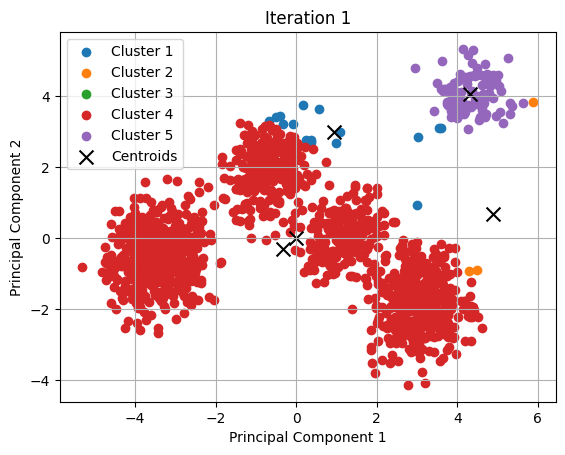

Running iteration 2/10


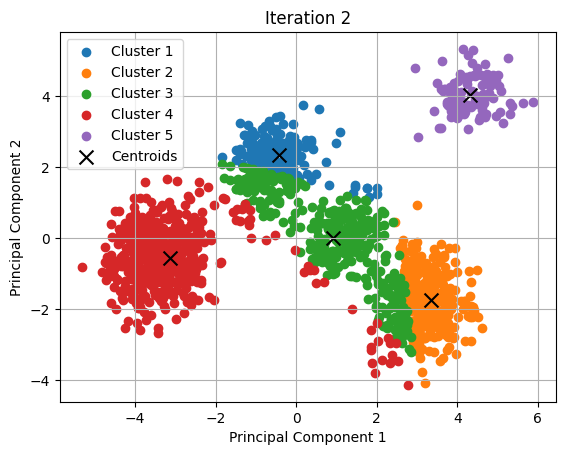

Running iteration 3/10


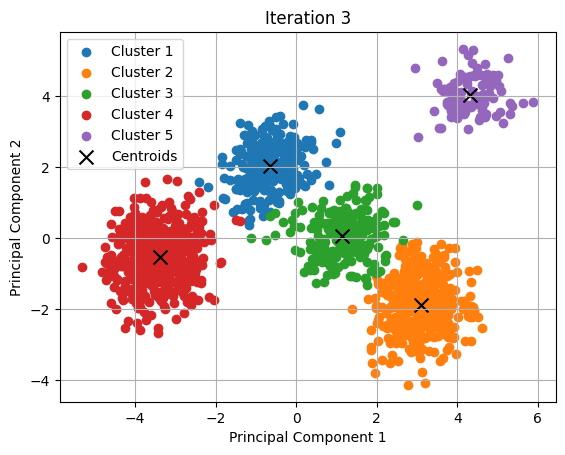

Running iteration 4/10


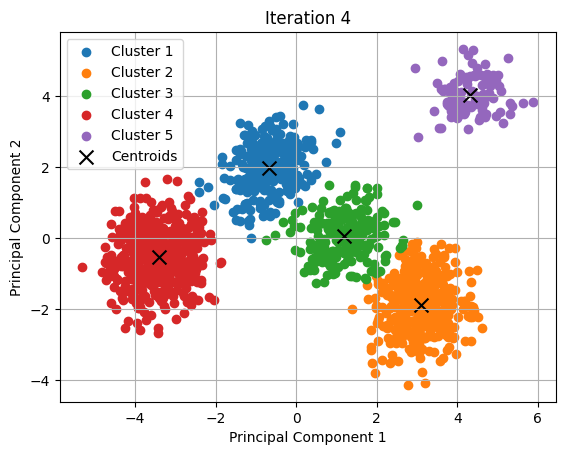

Running iteration 5/10


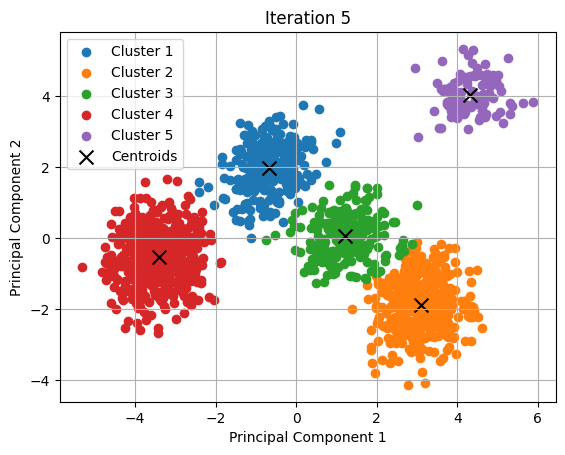

Running iteration 6/10


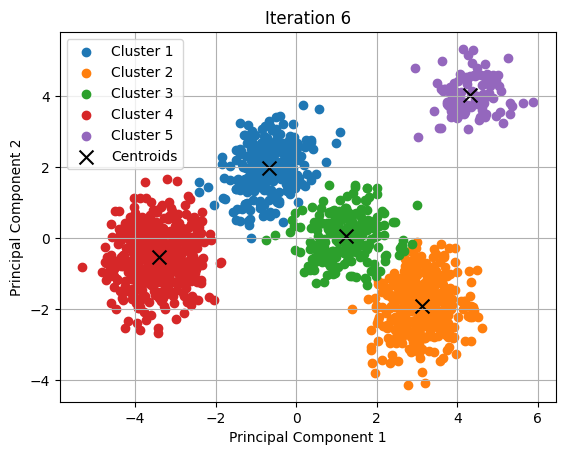

Running iteration 7/10


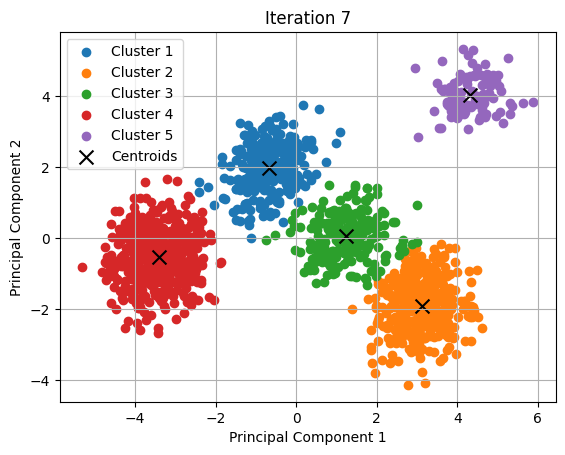

Running iteration 8/10


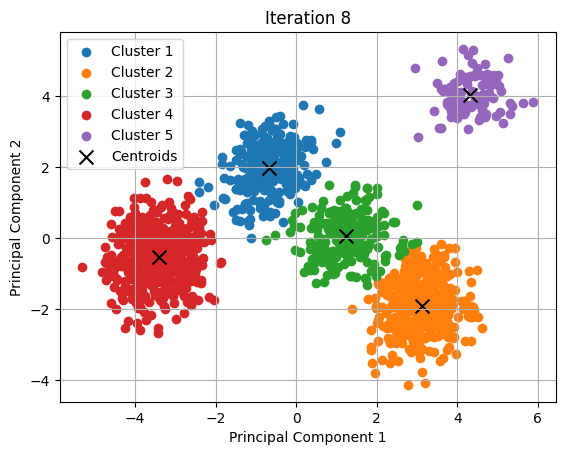

Running iteration 9/10


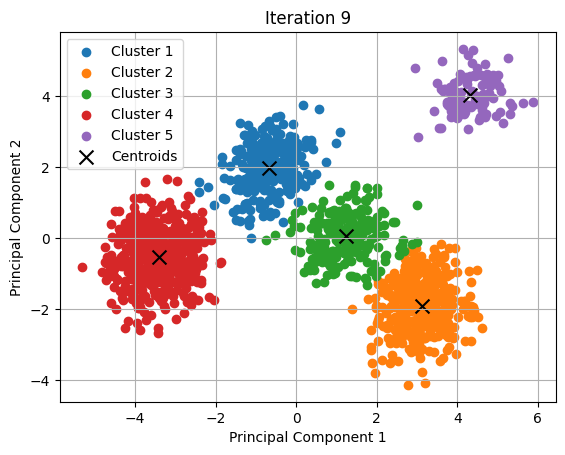

Running iteration 10/10


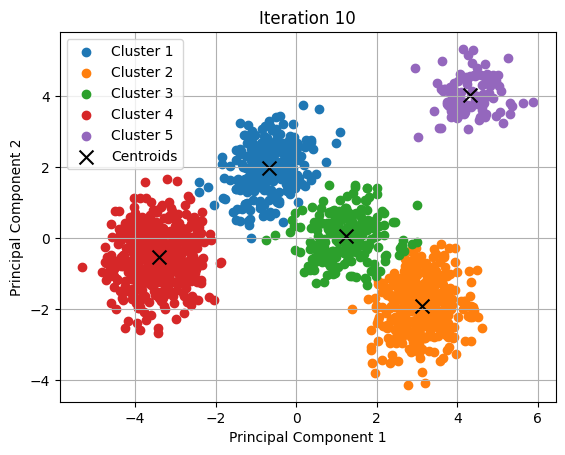

Cluster 1: 298 data points
Cluster 2: 388 data points
Cluster 3: 215 data points
Cluster 4: 499 data points
Cluster 5: 99 data points


In [22]:
import numpy as np
def findClosestCentroids(X, centroids):
    """
    Find the closest centroids for each data point.
    """
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0], 1))

    for i in range(X.shape[0]):
        distance = np.inf  # Initialize a large distance
        for k in range(K):
            temp2 = X[i, :] - centroids[k, :]
            dis_t = temp2 @ temp2.T  # Squared distance
            if dis_t < distance:
                distance = dis_t
                temp1 = k
        idx[i] = temp1
    return idx

def computeCentroids(X, idx, K):
    """
    Compute new centroids as the mean of points in each cluster.
    """
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        points = X[idx.flatten() == k]
        centroids[k, :] = np.mean(points, axis=0) if len(points) > 0 else centroids[k, :]
    return centroids

def runKMeans(X, init_centroids, max_iters, plotProgress=False):
    """
    Run the K-means algorithm.
    """
    m, n = X.shape
    K = init_centroids.shape[0]
    idx = np.zeros((m, 1))
    centroids = init_centroids
    cent_hist = np.zeros((K, n, max_iters+1))
    cent_hist[:, :, 0] = init_centroids

    for i in range(max_iters):
        print(f"Running iteration {i+1}/{max_iters}")
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K)
        cent_hist[:, :, i+1] = centroids

        # Plot progress if enabled
        if plotProgress:
            plt.figure()
            for k in range(K):
                cluster_points = X[idx.flatten() == k]
                plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {k+1}")
            plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label="Centroids")
            plt.title(f"Iteration {i+1}")
            plt.xlabel("Principal Component 1")
            plt.ylabel("Principal Component 2")
            plt.legend()
            plt.grid(True)
            plt.show()

    return centroids, idx

# Initialize the centroids for K=5 and run the algorithm
K = 5
max_iters = 10
initial_centroids = np.array([[3, 3], [6, 2], [8, 5], [1, 0], [4, 4]])

# Run K-means on the data
final_centroids, final_idx = runKMeans(data_2d, initial_centroids, max_iters, plotProgress=True)

for k in range(K):
    cluster_points = data_2d[final_idx.flatten() == k]
    num_points = len(cluster_points)
    print(f"Cluster {k+1}: {num_points} data points")




Running iteration 1/15


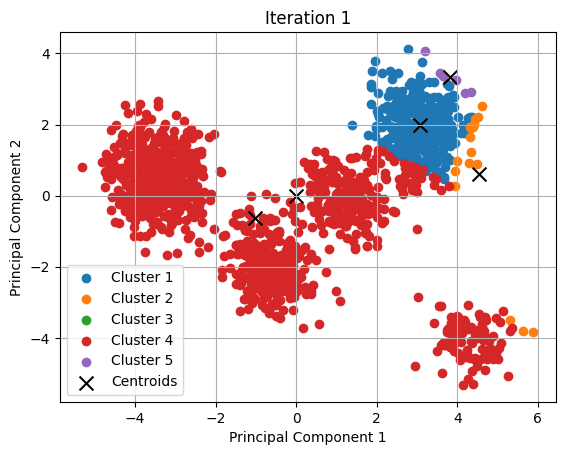

Running iteration 2/15


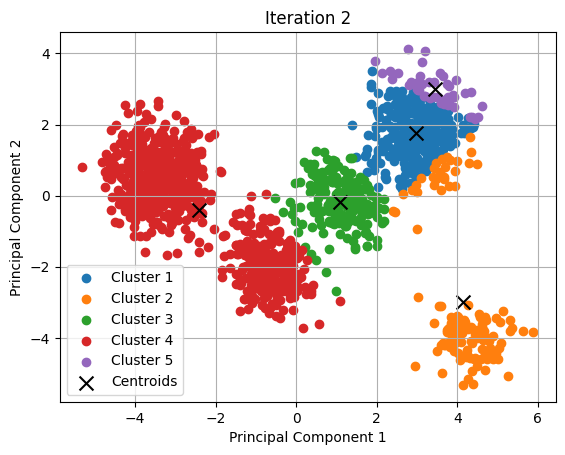

Running iteration 3/15


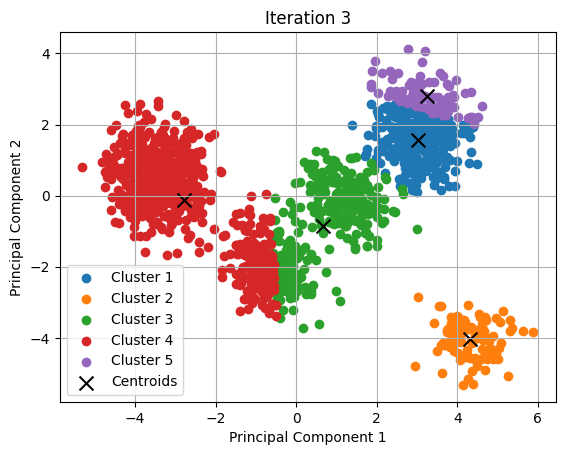

Running iteration 4/15


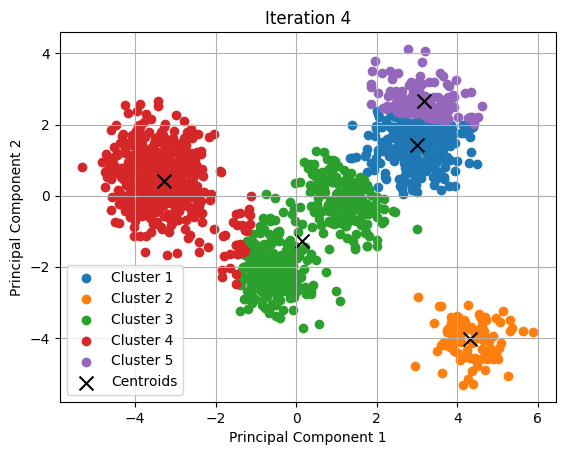

Running iteration 5/15


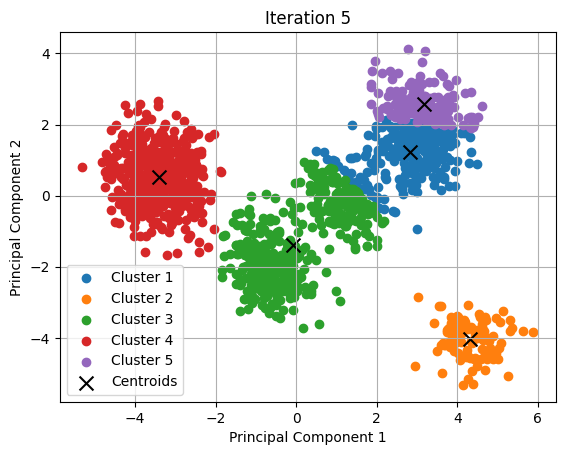

Running iteration 6/15


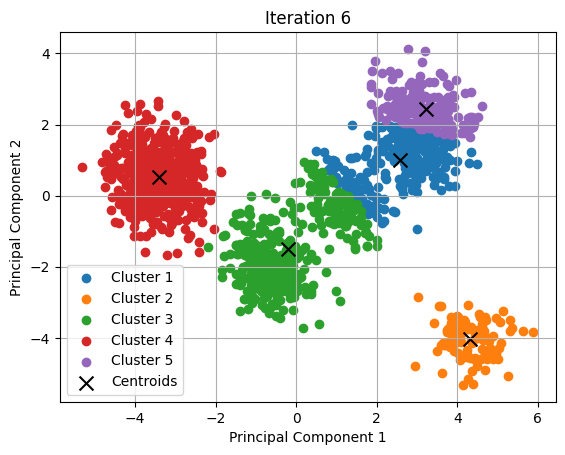

Running iteration 7/15


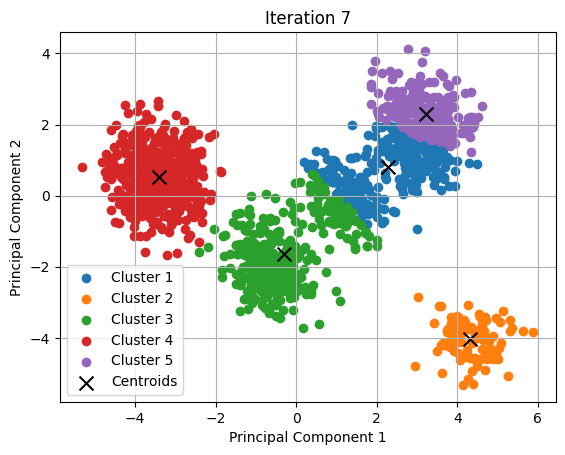

Running iteration 8/15


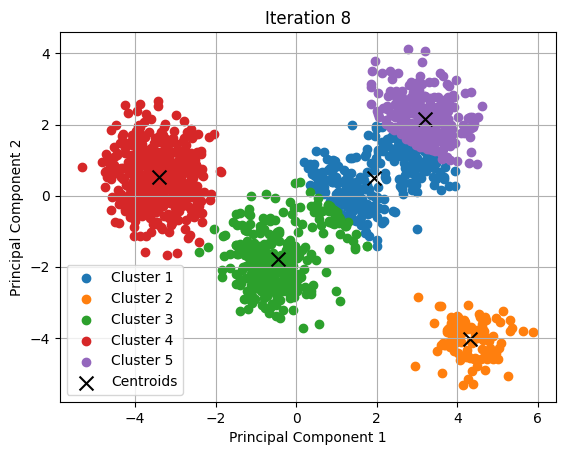

Running iteration 9/15


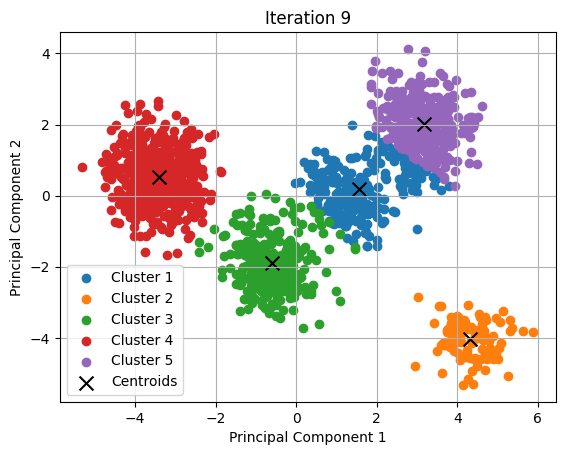

Running iteration 10/15


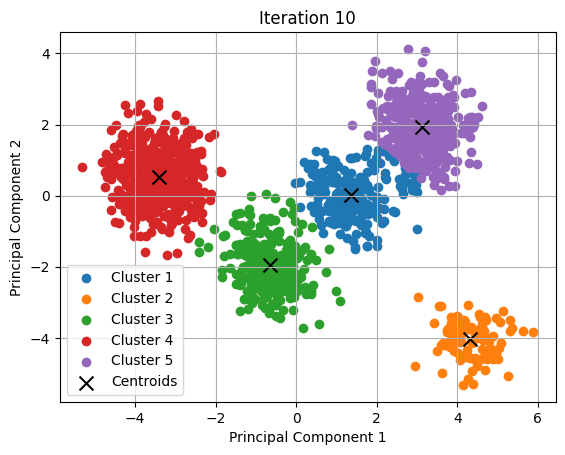

Running iteration 11/15


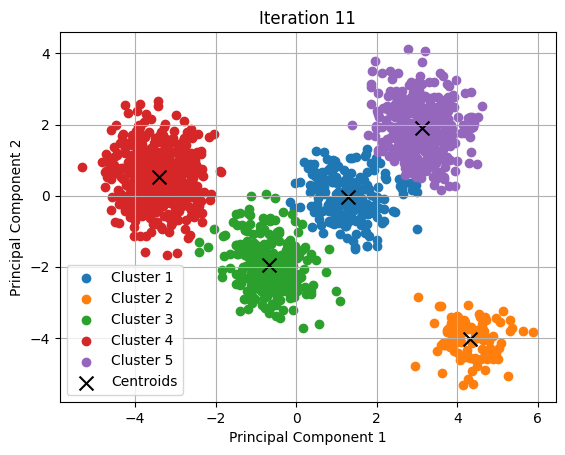

Running iteration 12/15


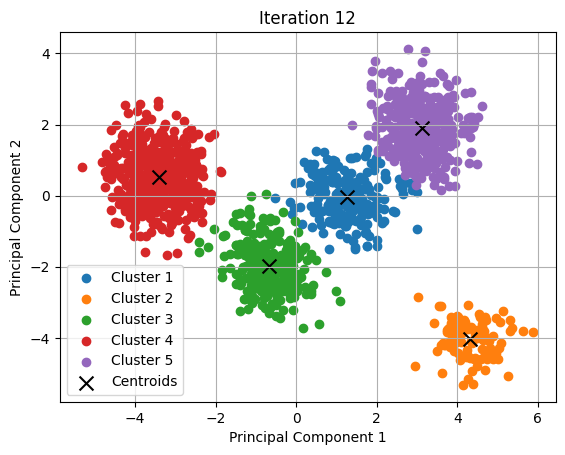

Running iteration 13/15


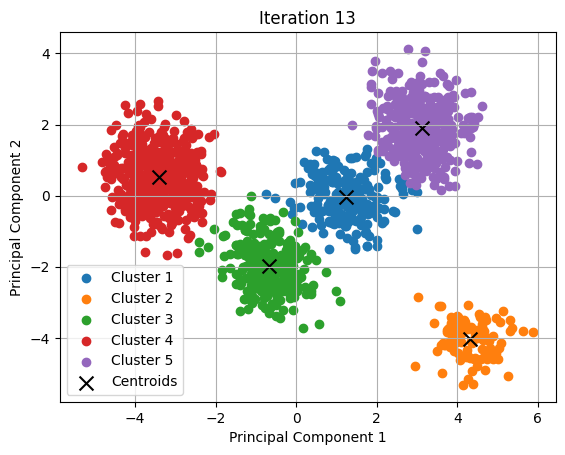

Running iteration 14/15


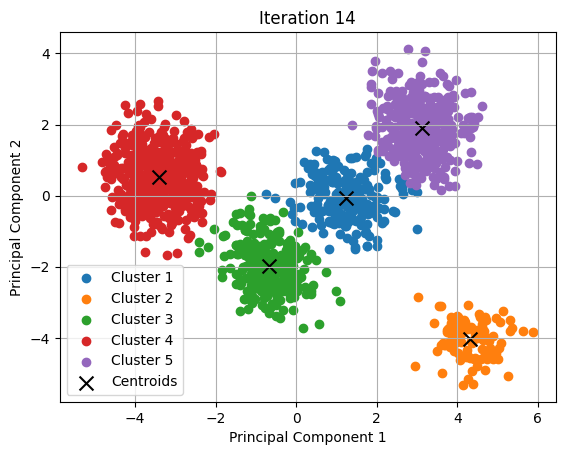

Running iteration 15/15


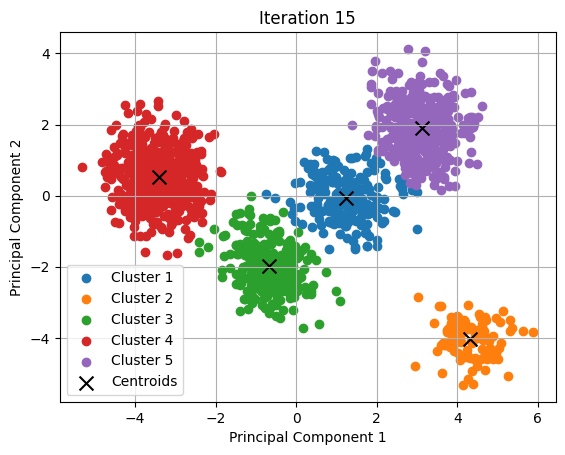

Cluster 1: 215 data points
Cluster 2: 99 data points
Cluster 3: 298 data points
Cluster 4: 499 data points
Cluster 5: 388 data points


In [26]:
import numpy as np
def findClosestCentroids(X, centroids):
    """
    Find the closest centroids for each data point.
    """
    K = centroids.shape[0]
    idx = np.zeros((X.shape[0], 1))

    for i in range(X.shape[0]):
        distance = np.inf  # Initialize a large distance
        for k in range(K):
            temp2 = X[i, :] - centroids[k, :]
            dis_t = temp2 @ temp2.T  # Squared distance
            if dis_t < distance:
                distance = dis_t
                temp1 = k
        idx[i] = temp1
    return idx

def computeCentroids(X, idx, K):
    """
    Compute new centroids as the mean of points in each cluster.
    """
    m, n = X.shape
    centroids = np.zeros((K, n))
    for k in range(K):
        points = X[idx.flatten() == k]
        centroids[k, :] = np.mean(points, axis=0) if len(points) > 0 else centroids[k, :]
    return centroids

def runKMeans(X, init_centroids, max_iters, plotProgress=False):
    """
    Run the K-means algorithm.
    """
    m, n = X.shape
    K = init_centroids.shape[0]
    idx = np.zeros((m, 1))
    centroids = init_centroids
    cent_hist = np.zeros((K, n, max_iters+1))
    cent_hist[:, :, 0] = init_centroids

    for i in range(max_iters):
        print(f"Running iteration {i+1}/{max_iters}")
        idx = findClosestCentroids(X, centroids)
        centroids = computeCentroids(X, idx, K)
        cent_hist[:, :, i+1] = centroids

        # Plot progress if enabled
        if plotProgress:
            plt.figure()
            for k in range(K):
                cluster_points = X[idx.flatten() == k]
                plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f"Cluster {k+1}")
            plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label="Centroids")
            plt.title(f"Iteration {i+1}")
            plt.xlabel("Principal Component 1")
            plt.ylabel("Principal Component 2")
            plt.legend()
            plt.grid(True)
            plt.show()

    return centroids, idx

# Initialize the centroids for K=5 and run the algorithm
K = 5
max_iters = 15
initial_centroids = np.array([[3, 3], [6, 2], [8, 5], [1, 0], [4, 4]])

# Run K-means on the data
final_centroids, final_idx = runKMeans(data_2d, initial_centroids, max_iters, plotProgress=True)

for k in range(K):
    cluster_points = data_2d[final_idx.flatten() == k]
    num_points = len(cluster_points)
    print(f"Cluster {k+1}: {num_points} data points")




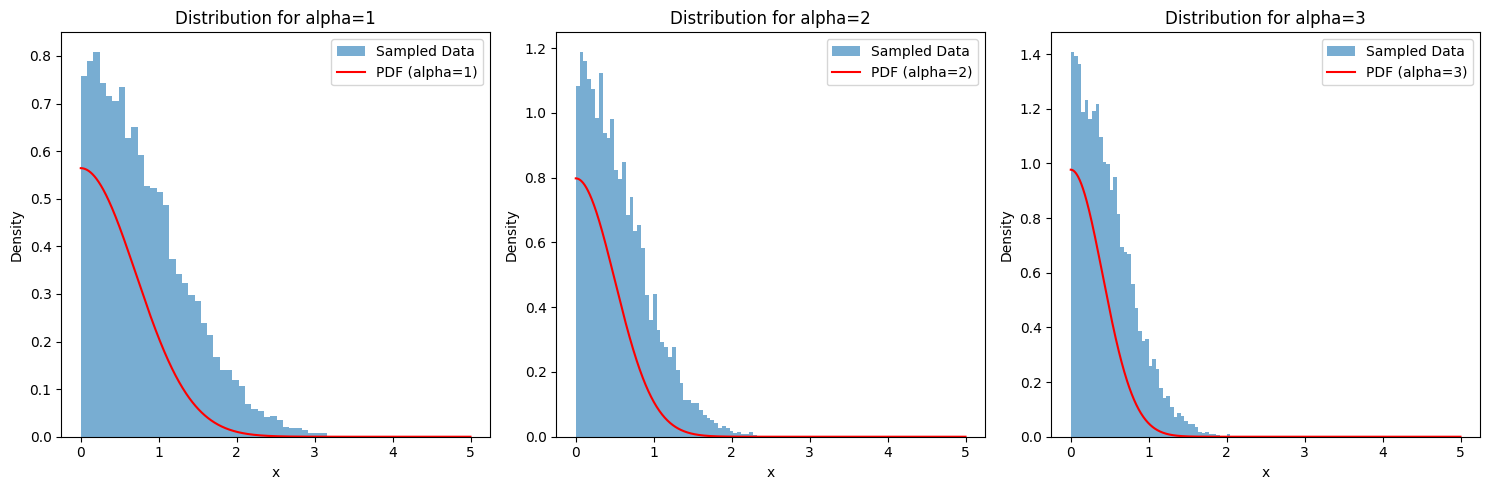

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

# Define the probability density function (PDF)
def pdf(x, alpha):
    return np.sqrt(alpha / np.pi) * np.exp(-alpha * x**2)

# Generate samples using the inverse transform sampling method
def generate_samples(alpha, num_samples=10000):
    std_normal = np.random.randn(num_samples)
    samples = np.abs(std_normal) / np.sqrt(alpha)  # Transformation for |X| from N(0, 1)
    return samples

# Plot the histograms and the PDF for alpha = 1, 2, 3
alphas = [1, 2, 3]
x = np.linspace(0, 5, 1000)  # Range for plotting the PDF

plt.figure(figsize=(15, 5))
for i, alpha in enumerate(alphas, 1):
    samples = generate_samples(alpha)
    plt.subplot(1, 3, i)
    plt.hist(samples, bins=50, density=True, alpha=0.6, label='Sampled Data')
    plt.plot(x, pdf(x, alpha), 'r-', label=f'PDF (alpha={alpha})')
    plt.title(f'Distribution for alpha={alpha}')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.legend()
plt.tight_layout()
plt.show()


In [ ]:

# Calculate the numerical mean and variance for each alpha
for alpha in alphas:
    samples = generate_samples(alpha)
    mean = np.mean(samples)
    variance = np.var(samples)
    print(f"Alpha = {alpha}: Mean = {mean:.4f}, Variance = {variance:.4f}")


Alpha = 1: Mean = 0.7958, Variance = 0.3686
Alpha = 2: Mean = 0.5587, Variance = 0.1779
Alpha = 3: Mean = 0.4603, Variance = 0.1229
